In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10000)

## border coins

In [14]:
# pix_count = 0
def fourConnComp(i,j,im,final,visited):
    if(i<0 or i>=im.shape[0] or j<0 or j>=im.shape[1] or visited[i,j] == 1):
        return 0
    
    visited[i,j] = 1
    if(im[i,j] == 1):
        final[i,j] = 1
#         global pix_count 
#         pix_count = pix_count + 1
        fourConnComp(i+1,j,im,final,visited)
        fourConnComp(i-1,j,im,final,visited)        
        fourConnComp(i,j+1,im,final,visited)        
        fourConnComp(i,j-1,im,final,visited)  
    
    return 0

In [15]:
def fill(temp,im2):
    h,w = temp.shape
    final = np.zeros((temp.shape),dtype=np.uint16)
    visited = np.zeros((temp.shape))
    
    for i in range(h):
        for j in range(w):
            if(temp[i,j] == 1 and visited[i,j] == 0):
                fourConnComp(i,j,im2,final,visited)
                
    return final

In [16]:
def getBorder(im):
    border = np.zeros(im.shape)
    border[:,0] = 1
    border[:,-1] = 1
    border[0,:] = 1
    border[-1,:] = 1
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
    im2 = cv2.erode(im,kernel,iterations=1)
    im2 = cv2.erode(im2,kernel,iterations=1)
    plt.imshow(im2,cmap='gray')
    temp = np.logical_and(im2,border).astype(np.uint8)
    final = fill(temp,im2)
    final = cv2.dilate(final,kernel,iterations=2)
    
    return final

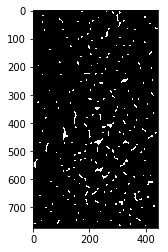

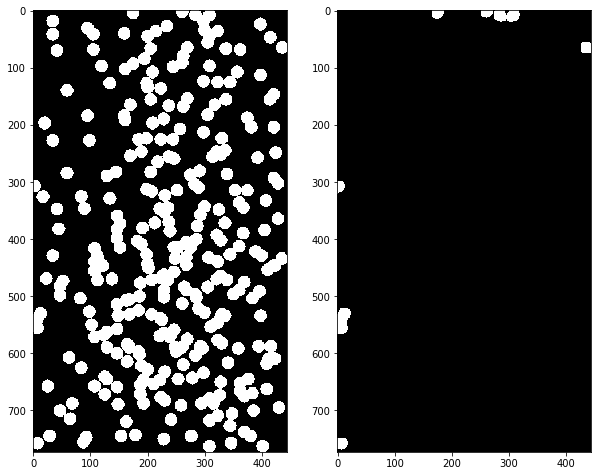

In [17]:
im = cv2.imread("../input_data/coins.jpg",0)
im = (im>127).astype(np.uint8)
# plt.imshow(im,cmap='gray')
final = getBorder(im)
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(final,cmap='gray')
plt.show()


## overlapping coins

In [77]:
pix_count = 0
def fourConnComp2(i,j,visited,temp,im):
    global pix_count
    if i<0 or i>=temp.shape[0] or j<0 or j>=temp.shape[1] or visited[i,j]==1:
        return 0
    pix_count += 1
    visited[i,j] = 1
    if im[i,j]==1:
        temp[i,j] = 1
        fourConnComp2(i+1,j,visited,temp,im)
        fourConnComp2(i,j+1,visited,temp,im)
        fourConnComp2(i-1,j,visited,temp,im)
        fourConnComp2(i,j-1,visited,temp,im)
    return 0    

def find_ol(im):  
    h,w = im.shape
    visited = np.zeros((im.shape))
    temp = np.zeros((im.shape),dtype= np.uint16)
    ol = []
    for i in range(h):
        for j in range(w):
            if(im[i,j]==1 and visited[i,j]==0):
                global pix_count
                pix_count = 0
                fourConnComp2(i,j,visited,temp,im)
                if(pix_count>500):
                    ol.append([i,j])
                    
    visited = np.zeros((im.shape))
    ol_img = np.zeros(im.shape)
    for x in ol:
        if (im[x[0],x[1]]==1 and visited[x[0],x[1]]==0):
            fourConnComp2(x[0],x[1],visited,ol_img,im)            
    return  ol_img      

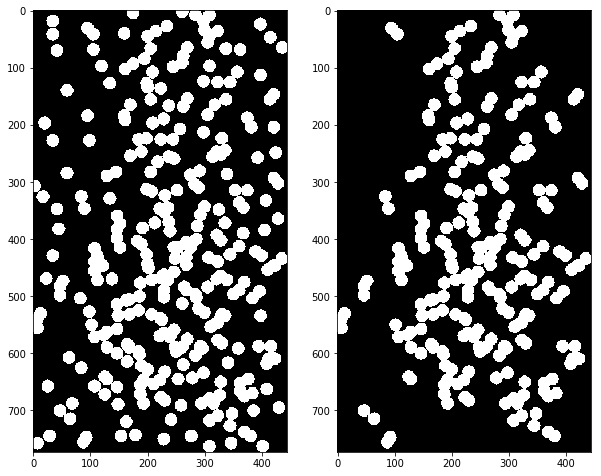

In [78]:
ol = find_ol(im)
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(ol,cmap='gray')
plt.show()

## non overlapping coins

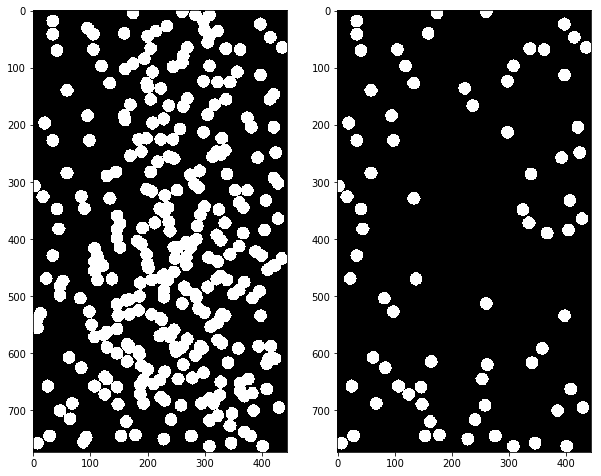

In [79]:
nonol = im - ol
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(nonol,cmap='gray')
plt.show()